# Choose 3 different classification techniques

## Read data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
heart_disease = pd.read_csv('data/heart_disease/heart.csv')

### Check data
`info()` method shows if there are missing values
it shows that there aren't any missing values (non-null for every feature)

In [14]:
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Show first rows of the data set

In [15]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

There are a few categorical variables (sex, cp, fbs, restecg, slope, thal), therefore we do some one hot encoding.

In [31]:
heart_disease_one_hot_encoded = pd.get_dummies(data=heart_disease, columns=['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal'])
heart_disease_one_hot_encoded.head()

,age,trestbps,chol,thalach,exang,oldpeak,ca,target,sex_0,sex_1,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,0,2.3,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,187,0,3.5,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,0,1.4,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
3,56,120,236,178,0,0.8,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,1,0.6,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


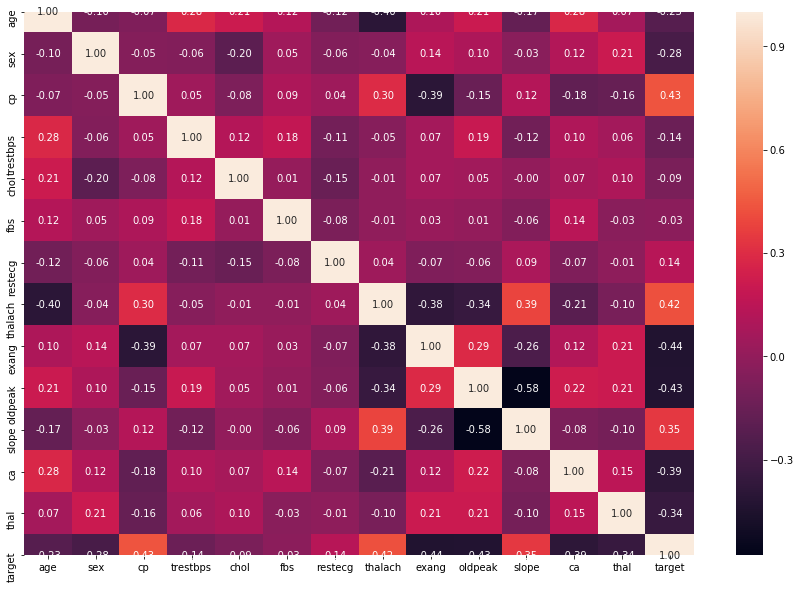

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_disease.corr(),annot=True,fmt='.2f')
plt.show()

## Creating train and test data 

In [48]:
X = heart_disease.drop('target', axis=1).values
y = heart_disease['target'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

## Starting with a simple model to:
+ get a sense of how challenging the problem is
+ many more things might go wrong with complex models
+ how much signal can we pull out using basic models

## Logistic Regression

### Logistic Regression parameters

In [50]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix  

In [51]:
pipe_logreg = Pipeline([
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression())
])

In [52]:
# create parameter list for ridge regression
params_logreg = {
    'logreg__C':[0.5, 0.6, 0.7, 1.1],
    'logreg__class_weight': ['balanced']
}

In [53]:
# setup cross validation parameter grid search
grid_logreg = GridSearchCV(estimator=pipe_logreg,
    param_grid=params_logreg,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1)

In [54]:
# fitting model on training data
grid_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.8s finished
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_rati

In [55]:
# extracting best parameters (can be used for finer hyper parameter tuning)
grid_logreg.best_params_

{'logreg__C': 0.5, 'logreg__class_weight': 'balanced'}

In [56]:
grid_logreg.score(X_test, y_test) 

0.799672131147541

In [57]:
y_pred = grid_logreg.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [59]:
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

[[19  9]
 [ 3 30]]


## KNN-Classifier
__Score history:__

### KNN Parameters:

In [61]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import MinMaxScaler

In [62]:
pipe_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

In [63]:
params_knn = {
    'knn__n_neighbors': [3, 5, 7, 9] 
}

In [65]:
grid_knn = GridSearchCV(estimator=pipe_knn,
    param_grid=params_knn,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1)

In [66]:
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'k

In [67]:
grid_knn.best_params_

{'knn__n_neighbors': 3}

In [68]:
grid_knn.score(X_test, y_test) 

0.7536979780679315

In [69]:
y_pred_knn = grid_knn.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [71]:
print(confusion_matrix(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)

[[20  8]
 [ 7 26]]


## Random Forest
__Score history:__

### Random Forest parameters
- __n_estimators:__
    - number of trees in the forest
- __max_depth:__
    - maximum depth of the tree
- __min_samples_split:__
    - the min. number of samples required to split an internal node
- __min_samples_leaf:__
    - the minimum number of samples required to be at a leaf node
- __min_weight_fraction_leaf:__
    - the minimum weighted fraction of the sum total of weights
- __max_features:__
    - the number of features to consider when looking for the best split
- __min_impurity_decrease:__
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

In [74]:
params_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10, 20, 21, 22],
    'rf__min_samples_split': [2, 3, 4]
}

In [75]:
grid_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=params_rf,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1)

In [76]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    4.8s finished
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                       

In [77]:
grid_rf.best_params_

{'rf__max_depth': 10, 'rf__min_samples_split': 4, 'rf__n_estimators': 100}

In [78]:
grid_rf.score(X_test, y_test)

0.8312656919214296

In [79]:
y_pred_rf = grid_rf.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [81]:
print(confusion_matrix(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)

[[19  9]
 [ 1 32]]


## Creating a GradientBoostingClassifier
__Score history:__

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
pipe_gbc = Pipeline([
    ('gbc', GradientBoostingClassifier())
])

In [84]:
params_gbc = {
    'gbc__n_estimators': [200],
    'gbc__max_depth': [4, 5, 6, 7],
    'gbc__max_features': ['log2'],
    'gbc__learning_rate': [0.05, 0.1, 0.15, 0.3],
    'gbc__subsample': [0.8]
}

In [85]:
grid_gbc = GridSearchCV(estimator=pipe_gbc,
    param_grid=params_gbc,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1
)

In [86]:
grid_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.0s finished
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('gbc',
                                        GradientBoostingClassifier(criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                                                                   min_samp

In [87]:
grid_gbc.best_params_

{'gbc__learning_rate': 0.1,
 'gbc__max_depth': 5,
 'gbc__max_features': 'log2',
 'gbc__n_estimators': 200,
 'gbc__subsample': 0.8}

In [88]:
grid_gbc.score(X_test, y_test)

0.7637719686900014

In [89]:
y_pred_gbc = grid_gbc.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred_gbc)) 

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        28
           1       0.73      0.91      0.81        33

    accuracy                           0.77        61
   macro avg       0.79      0.76      0.76        61
weighted avg       0.79      0.77      0.76        61



In [91]:
print(confusion_matrix(y_test, y_pred_gbc))
cm = confusion_matrix(y_test, y_pred_gbc)

[[17 11]
 [ 3 30]]


## Creating MLP-Classifier



In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
mdl_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', alpha=0.0001, 
						batch_size=20, learning_rate='invscaling', learning_rate_init=0.001, verbose=True)



In [95]:
mdl_mlp.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 2.89923358
Iteration 3, loss = 1.41700695
Iteration 4, loss = 1.14189362
Iteration 5, loss = 0.88730537
Iteration 6, loss = 1.03293867
Iteration 7, loss = 1.10157305
Iteration 8, loss = 0.77716145
Iteration 9, loss = 0.70323176
Iteration 10, loss = 0.82361241
Iteration 11, loss = 0.71756746
Iteration 12, loss = 0.61419890
Iteration 13, loss = 0.59713784
Iteration 14, loss = 0.68544236
Iteration 15, loss = 0.57668670
Iteration 16, loss = 0.64455236
Iteration 17, loss = 0.57636824
Iteration 18, loss = 0.55652060
Iteration 19, loss = 0.59980238
Iteration 20, loss = 0.55165686
Iteration 21, loss = 0.55830416
Iteration 22, loss = 0.51471787
Iteration 23, loss = 0.53105958
Iteration 24, loss = 0.59956355
Iteration 25, loss = 0.49533328
Iteration 26, loss = 0.53148862
Iteration 27, loss = 0.54954509
Iteration 28, loss = 0.68348392
Iteration 29, loss = 0.98427701
Iteration 30, loss = 0.71796916
Iteration 31, loss = 0.54436075
Iteration 32, loss = 0.5

MLPClassifier(activation='relu', alpha=0.0001, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [96]:
mdl_mlp.score(X_test, y_test)

0.7213114754098361

In [97]:
y_pred_mdl = mdl_mlp.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred_mdl)) 

              precision    recall  f1-score   support

           0       0.87      0.46      0.60        28
           1       0.67      0.94      0.78        33

    accuracy                           0.72        61
   macro avg       0.77      0.70      0.69        61
weighted avg       0.76      0.72      0.70        61



In [99]:
print(confusion_matrix(y_test, y_pred_mdl))
cm = confusion_matrix(y_test, y_pred_mdl)

[[13 15]
 [ 2 31]]
